In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving exchange_rate.csv to exchange_rate.csv


In [ ]:
rate=pd.read_csv('exchange_rate.csv')

In [ ]:
rate

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [ ]:
rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [ ]:
rate.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [ ]:
rate.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7583    False
7584    False
7585    False
7586    False
7587    False
Length: 7588, dtype: bool

In [ ]:
rate[rate.duplicated()]

,date,Ex_rate


In [ ]:
rate.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [ ]:
rate['date'] = pd.to_datetime(rate['date'], format="%d-%m-%Y %H:%M")

In [ ]:
rate

,date,Ex_rate
0,1990-01-01,0.785500
1,1990-01-02,0.781800
2,1990-01-03,0.786700
3,1990-01-04,0.786000
4,1990-01-05,0.784900
...,...,...
7583,2010-10-06,0.718494
7584,2010-10-07,0.721839
7585,2010-10-08,0.723197
7586,2010-10-09,0.720825


In [ ]:
rate['year'] = rate['date'].dt.year
rate['month'] = rate['date'].dt.month

In [ ]:
rate.head()

,date,Ex_rate,year,month
0,1990-01-01,0.7855,1990,1
1,1990-01-02,0.7818,1990,1
2,1990-01-03,0.7867,1990,1
3,1990-01-04,0.7860,1990,1
4,1990-01-05,0.7849,1990,1


In [ ]:
rate.tail()

,date,Ex_rate,year,month
7583,2010-10-06,0.718494,2010,10
7584,2010-10-07,0.721839,2010,10
7585,2010-10-08,0.723197,2010,10
7586,2010-10-09,0.720825,2010,10
7587,2010-10-10,0.720825,2010,10


Outliers calculation for Ex_rate
Axes(0.125,0.11;0.775x0.77)
count    7588.000000
mean        0.776974
std         0.136620
min         0.483297
25%         0.701422
50%         0.761377
75%         0.873477
max         1.102536
Name: Ex_rate, dtype: float64
count    7588.000000
mean        0.776974
std         0.136620
min         0.483297
25%         0.701422
50%         0.761377
75%         0.873477
max         1.102536
Name: Ex_rate, dtype: float64
Quartile 1 :  0.701422
Quartile 3 :  0.873477
Inter-Quartile Range :  0.17205499999999996
Upper Limit :  1.1315594999999998
Lower Limit :  0.44333950000000005
Empty DataFrame
Columns: [date, Ex_rate, year, month, z_score]
Index: []
Outliers calculation for month
Axes(0.125,0.11;0.775x0.77)
count    7588.000000
mean        6.473379
std         3.433021
min         1.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        12.000000
Name: month, dtype: float64
count    7588.000000
mean        6.473379
std         3.

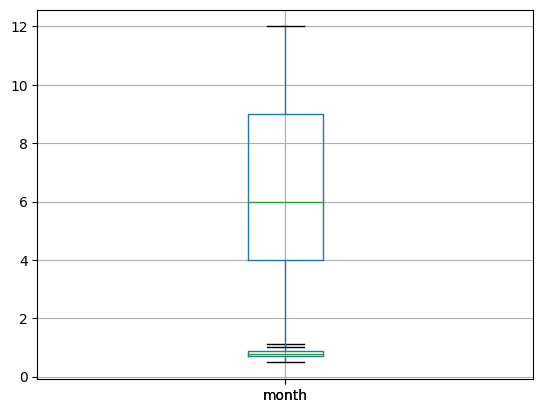

In [ ]:
#Outlier Detection for all columns
Num_Columns= ['Ex_rate','month']
for i in Num_Columns:
  column_name = i
  print("Outliers calculation for", i)
  print(rate.boxplot(column=[column_name],grid=True))
  print(rate[column_name].describe())
#Quartile 1
  print(rate[column_name].describe())
  Q1=rate[column_name].quantile(0.25)
  print('Quartile 1 : ',Q1)
#Quartile 3
  Q3=rate[column_name].quantile(0.75)
  print('Quartile 3 : ',Q3)
#Interquartile Range
  IQR= Q3 - Q1
  print('Inter-Quartile Range : ',IQR)
#Upper Limit
  UL = Q3 + (1.5 * IQR)
  print('Upper Limit : ',UL)
#Lower Limit
  LL = Q1 - (1.5 * IQR)
  print('Lower Limit : ', LL)
  Outliers=rate[(rate[column_name] > UL) | (rate[column_name] < LL)]
  print(Outliers)

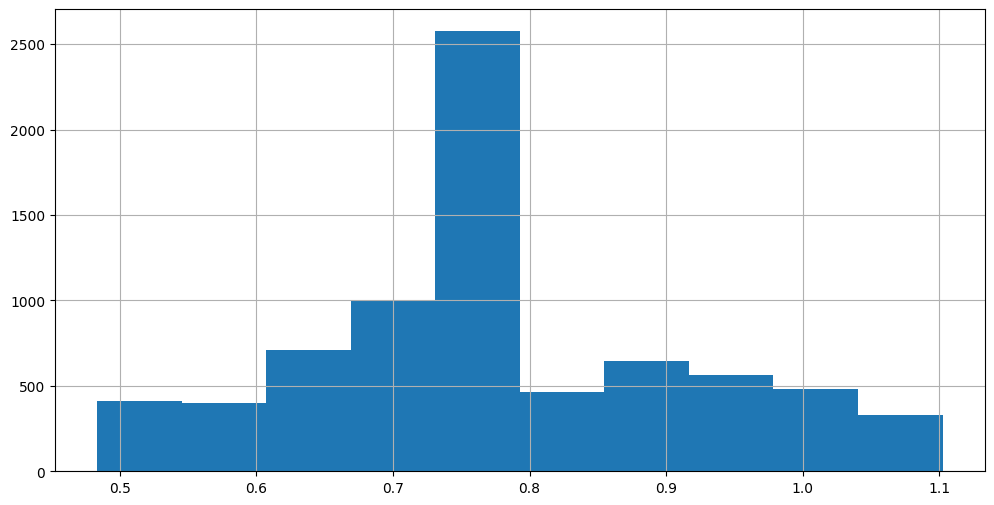

In [ ]:
rate.Ex_rate.hist(figsize=(12,6))
plt.show()

In [ ]:
rate['Ex_rate'].skew()

0.2611267376737365

<Axes: >

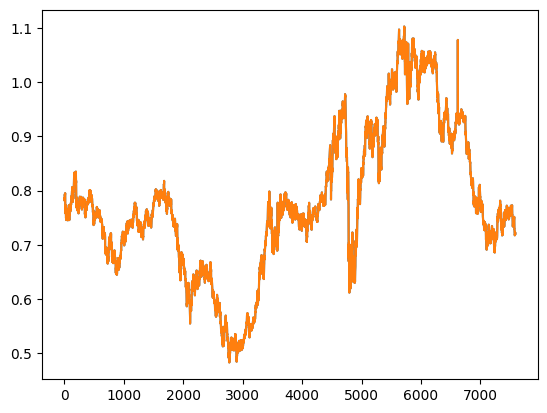

In [ ]:
rate.Ex_rate.plot()
rate['Ex_rate'].plot()

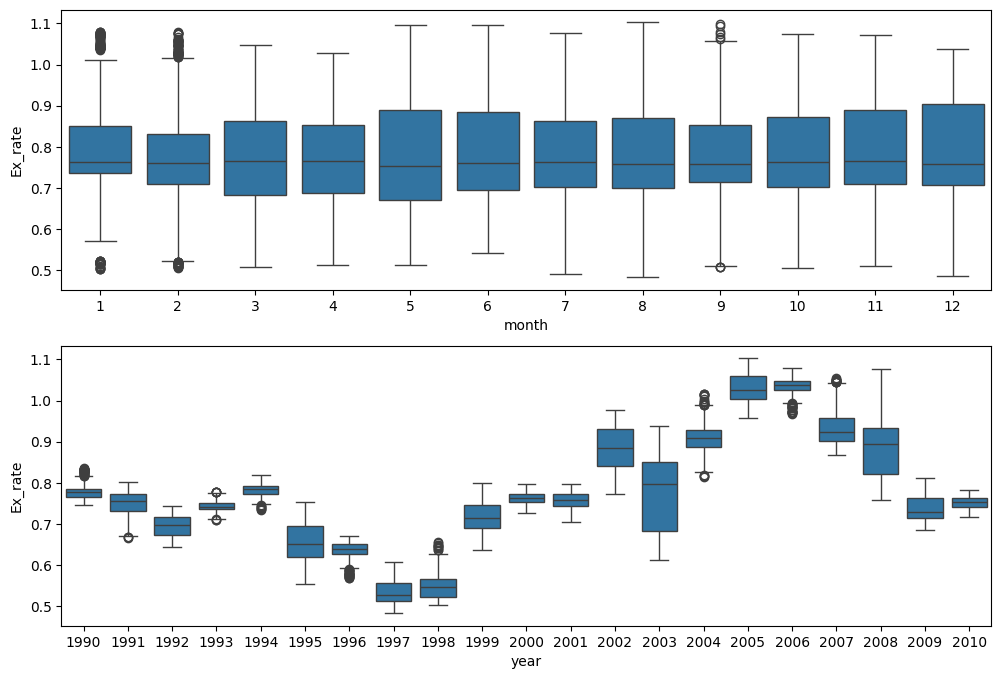

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(211)
sns.boxplot(x="month", y="Ex_rate", data=rate)
plt.subplot(212)
sns.boxplot(x="year", y="Ex_rate", data=rate)
plt.show()

### **LAG PLOT**

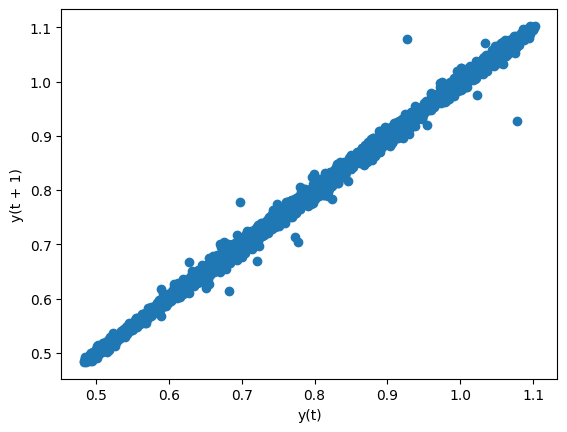

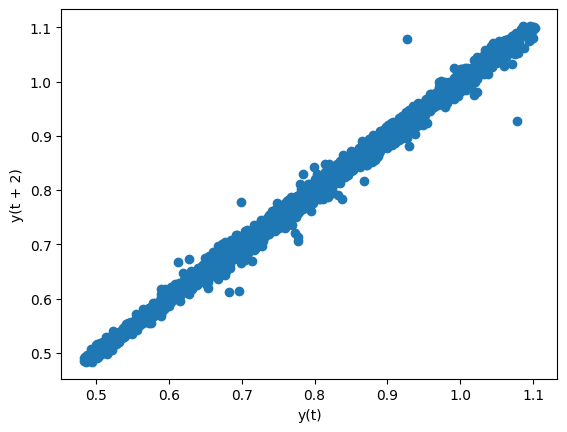

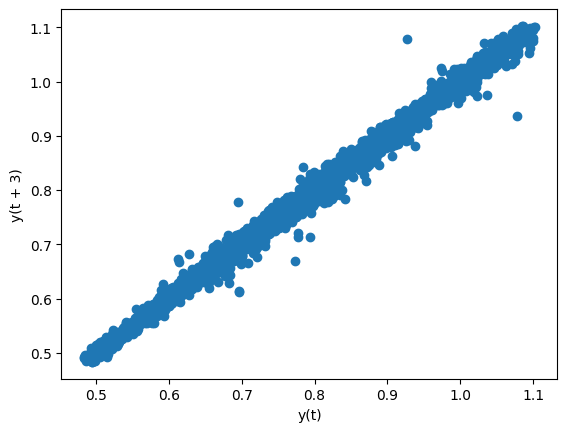

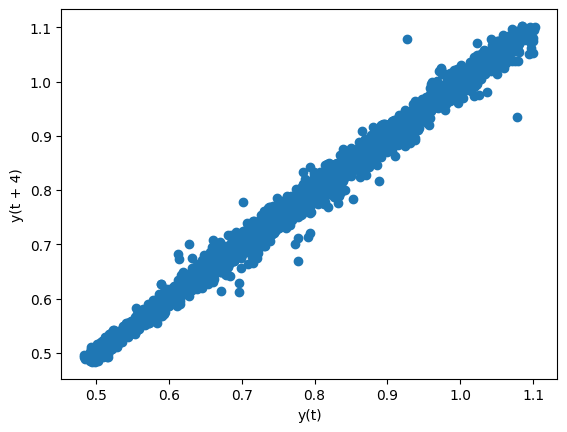

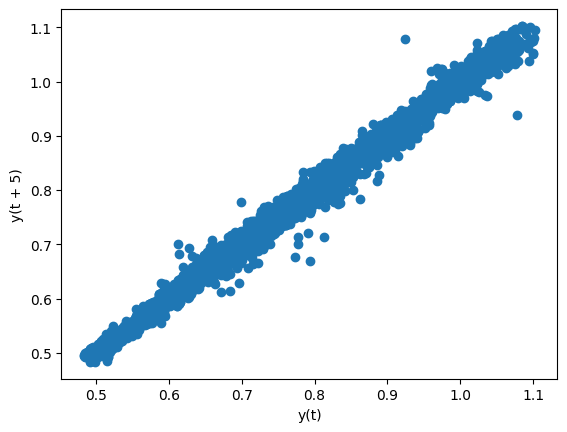

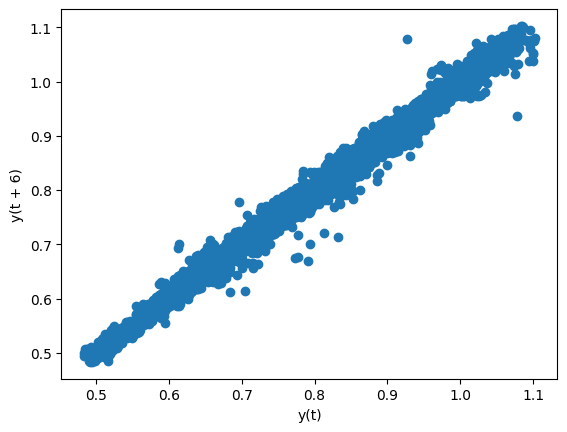

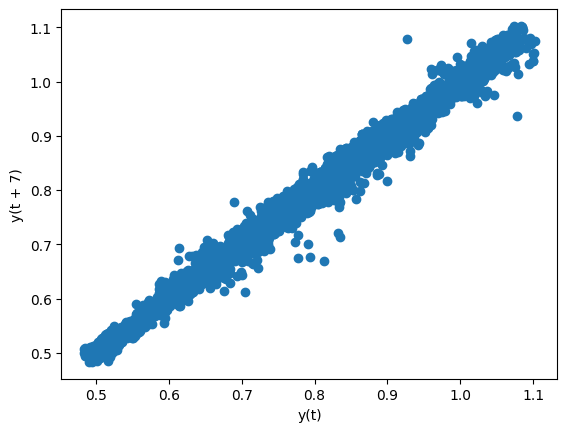

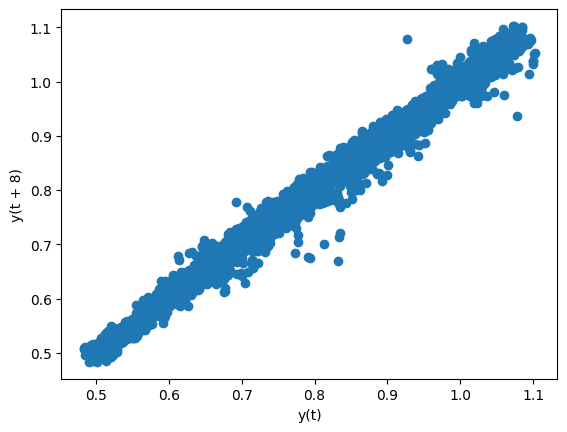

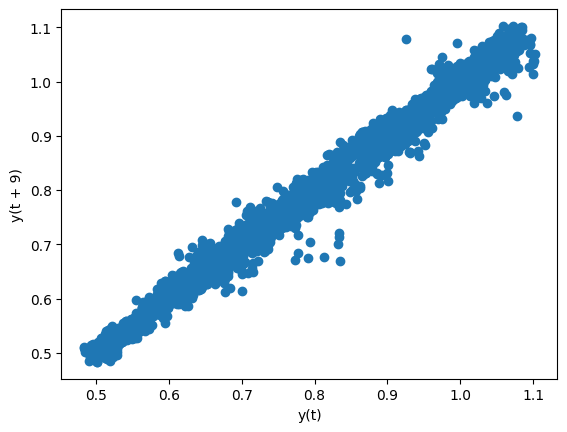

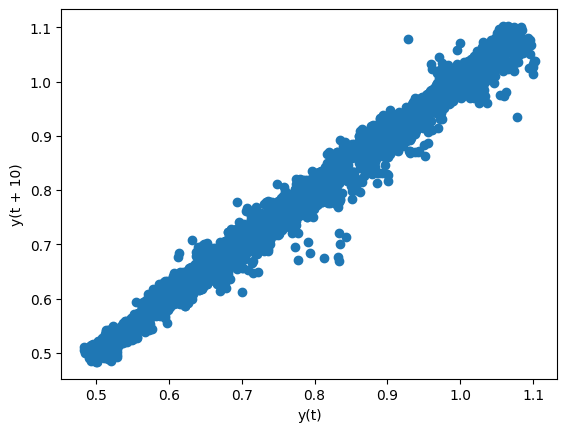

In [44]:
# create a scatter plot
for i in [1,2,3,4,5,6,7,8,9,10]:
    #plt.figure(figsize=(12,8))
    lag_plot(rate.Ex_rate, lag=i)
    plt.show()

In [45]:
# Splitting data
print(len(rate['Ex_rate']))
Train = rate.head(500)
Test = rate.tail(500)
print(Train)
print(Test)

7588
          date  Ex_rate  year  month   z_score
0   1990-01-01   0.7855  1990      1 -1.594333
1   1990-01-02   0.7818  1990      1 -1.594333
2   1990-01-03   0.7867  1990      1 -1.594333
3   1990-01-04   0.7860  1990      1 -1.594333
4   1990-01-05   0.7849  1990      1 -1.594333
..         ...      ...   ...    ...       ...
495 1991-05-11   0.7419  1991      5 -0.429179
496 1991-05-12   0.7430  1991      5 -0.429179
497 1991-05-13   0.7504  1991      5 -0.429179
498 1991-05-14   0.7513  1991      5 -0.429179
499 1991-05-15   0.7449  1991      5 -0.429179

[500 rows x 5 columns]
           date   Ex_rate  year  month   z_score
7088 2009-05-29  0.734592  2009      5 -0.429179
7089 2009-05-30  0.733272  2009      5 -0.429179
7090 2009-05-31  0.731904  2009      5 -0.429179
7091 2009-06-01  0.731904  2009      6 -0.137890
7092 2009-06-02  0.720747  2009      6 -0.137890
...         ...       ...   ...    ...       ...
7583 2010-10-06  0.718494  2010     10  1.027264
7584 2010-10-07

### **Moving Average**

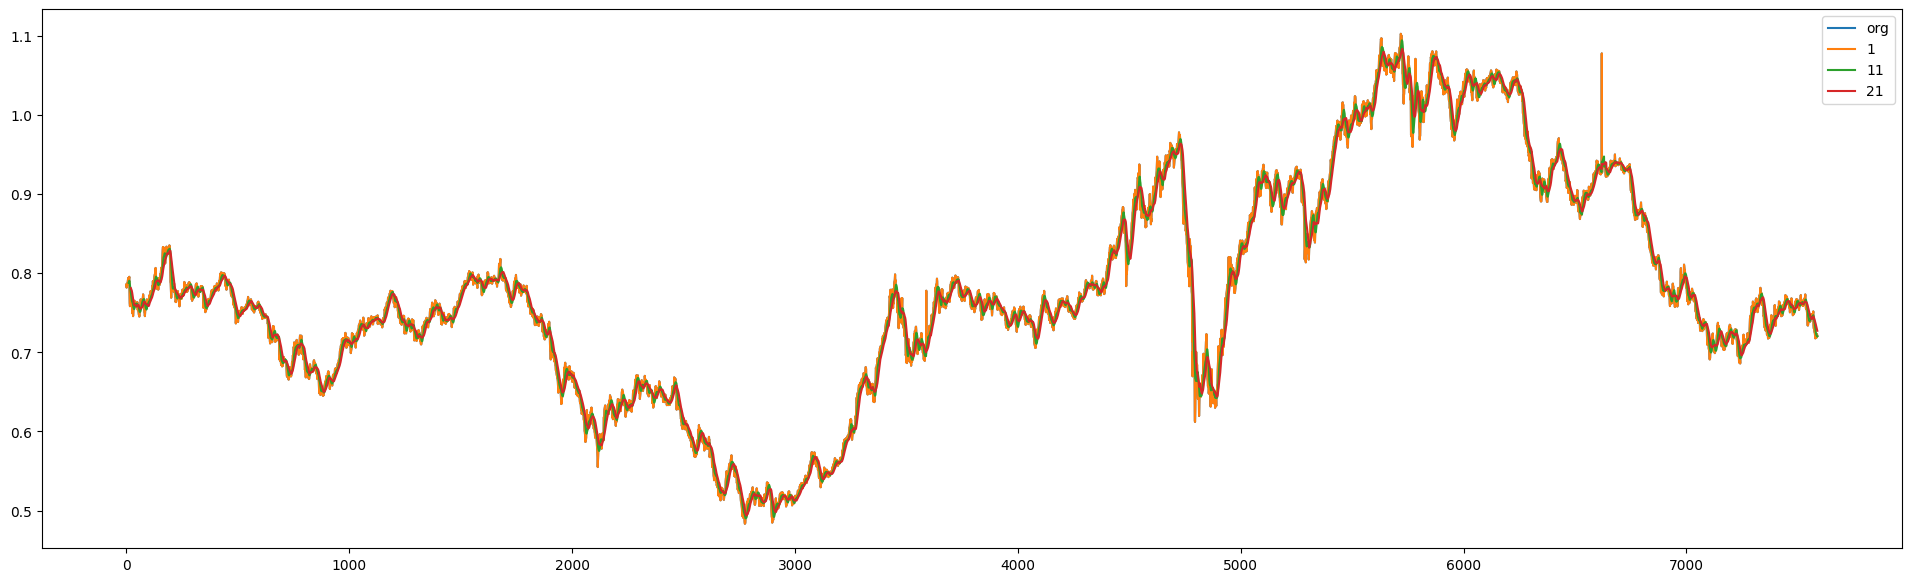

In [51]:
plt.figure(figsize=(24,7))
rate.Ex_rate.plot(label="org")
for i in range(1,30,10):
    rate["Ex_rate"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')  #Location of legend

### **Time series decomposition plot**

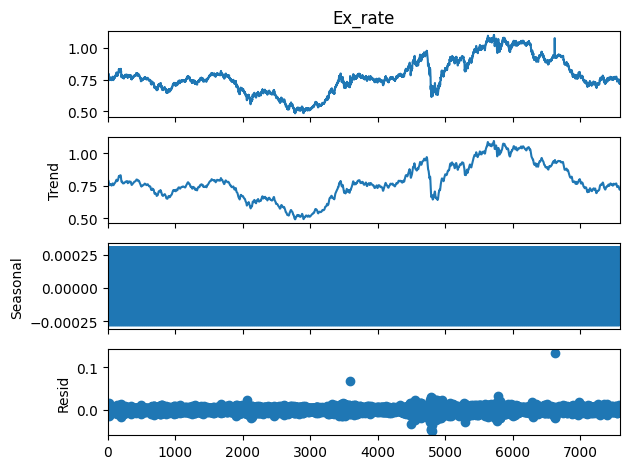

In [53]:
decompose_rate = seasonal_decompose(rate.Ex_rate,period=10)
decompose_rate.plot()
plt.show()

**ACF plots and PACF plots**

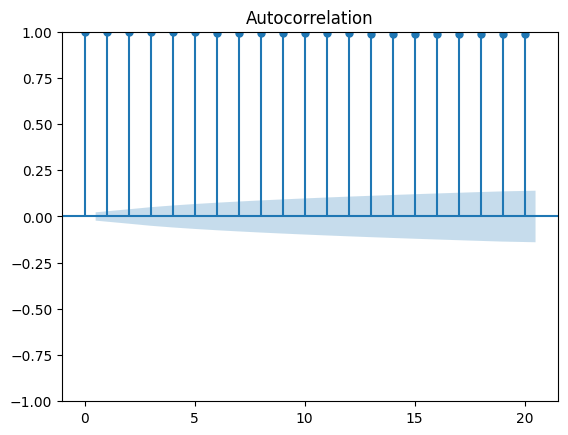

In [54]:
tsa_plots.plot_acf(rate.Ex_rate,lags=20)
plt.show()

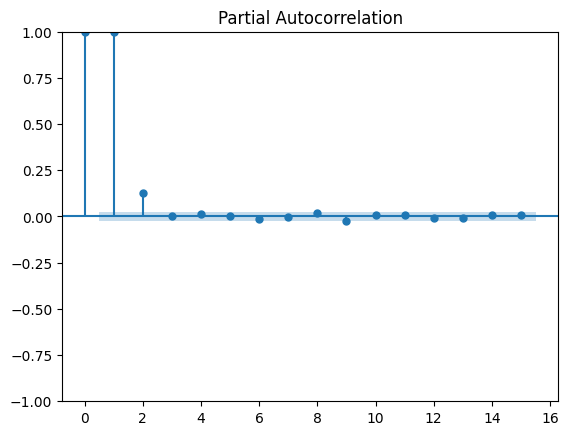

In [55]:
tsa_plots.plot_pacf(rate.Ex_rate,lags=15)
plt.show()

**Evaluation Metric MAPE**

In [56]:
#Mean Absolute Percentage Error
def MAPE(pred,org):
    Ex_rate = np.abs((pred-org)/org)*100
    return np.mean(Ex_rate)

In [57]:
rate.columns

Index(['date', 'Ex_rate', 'year', 'month', 'z_score'], dtype='object')

In [58]:
#Weighted Moving Average
import pandas as pd
import numpy as np
df=pd.DataFrame()
df['month']=rate["month"]
df['Ex_rate']=rate["Ex_rate"]
weights = np.array([0.1, 0.2, 0.3, 0.4])
df['WMA'] = df['Ex_rate'].rolling(4).apply(lambda x: np.sum(weights*x))
df['Error']=df['Ex_rate'] - df['WMA']
MAPE(df['WMA'],df['Ex_rate'])

0.33024502176348725

### **Simple Exponential Method**

In [59]:
#Alpha -> between 0 to 1
ses_model = SimpleExpSmoothing(Train["Ex_rate"]).fit(smoothing_level=0.1)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Ex_rate)

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


3.042747073454211

### **Holt Method**

In [83]:
#Holt method
#Alpha (smoothing_level)-> between 0 to 1
#Beta (smoothing_slope)-> between 0 to 1
hw_model = Holt(Train["Ex_rate"]).fit(smoothing_level=0.8, smoothing_slope=0.3)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Ex_rate)

<ipython-input-83-bcf927e54aa4>:4: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Ex_rate"]).fit(smoothing_level=0.8, smoothing_slope=0.3)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


106.07341759720013

**Holts winter exponential smoothing with additive seasonality and additive trend**

In [84]:
#add the trend to the model
hwe_model_adtv = ExponentialSmoothing(Train["Ex_rate"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_adtv = hwe_model_adtv.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_adtv,Test.Ex_rate)

64.18909531389052

**Holts winter exponential smoothing with multiplicative seasonality and additive trend**

In [85]:
hwe_model_mul_adtv = ExponentialSmoothing(Train["Ex_rate"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_adtv = hwe_model_mul_adtv.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_adtv,Test.Ex_rate)

72.95162481386208

**Final Model by combining train and test**

In [86]:
hwe_model_mul_adtv = ExponentialSmoothing(Train["Ex_rate"],seasonal="mul",trend="add",seasonal_periods=12).fit()

In [87]:
#Forecasting for next 10 time periods
hwe_model_mul_adtv.forecast(10)

500    0.745064
501    0.745050
502    0.745031
503    0.745586
504    0.745543
505    0.745564
506    0.744792
507    0.744775
508    0.744402
509    0.744381
dtype: float64

<Axes: >

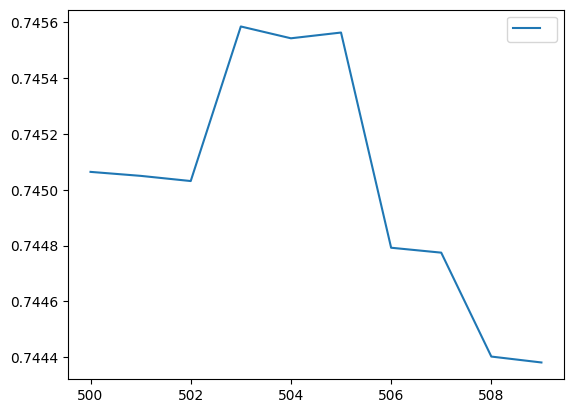

In [88]:
hwe_model_mul_adtv.forecast(10).plot(legend=True)